In [1]:
from tkinter.ttk import Treeview

import numpy as np


from matplotlib import pyplot as plt
from typing import Set, List, Tuple

from scipy.special import y1_zeros

In [2]:
def generate_new_points():
    x = np.random.random(10)
    y = np.random.random(10)
    return list(zip(x, y))

In [3]:
def plot_points_and_lines_with_simplices(points: List[Tuple[float, float]], intersections: List[Set[int]], 
                                         all_2_simplices: Set[Tuple[int, int, int]], epsilon: float, 
                                         draw_circles: bool = False):
    """Plot points, lines between intersecting points, fill 2-simplices, and optionally draw circles."""
    
    # Plot points
    x_coords = [p[0] for p in points]
    y_coords = [p[1] for p in points]
    plt.scatter(x_coords, y_coords, color='blue', zorder=5)
    
    # Plot circles around the points if draw_circles is True
    if draw_circles:
        for i, (x, y) in enumerate(points):
            circle = plt.Circle((x, y), epsilon, color='green', fill=False, linestyle='--', alpha=0.5, zorder=3)
            plt.gca().add_patch(circle)  # Add the circle to the plot
    
    # Plot lines based on the intersection data
    for i, connected_points in enumerate(intersections):
        for j in connected_points:
            # Draw a line between points[i] and points[j]
            x_values = [points[i][0], points[j][0]]
            y_values = [points[i][1], points[j][1]]
            plt.plot(x_values, y_values, 'r-', linewidth=1, zorder=1)  # Red lines with width 1
    
    # Fill in the triangles (2-simplices)
    for simplex in all_2_simplices:
        i, j, k = simplex
        x_triangle = [points[i][0], points[j][0], points[k][0]]
        y_triangle = [points[i][1], points[j][1], points[k][1]]
        plt.fill(x_triangle, y_triangle, 'cyan', alpha=0.3, zorder=2)  # Cyan with transparency
    
    # Set labels and show plot
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Points, Intersections, 2-Simplices, and Circles' if draw_circles else 'Points, Intersections, and 2-Simplices')
    plt.grid(True)
    plt.gca().set_aspect('equal', adjustable='box')  # Equal aspect ratio for proper circle display
    plt.xlim([0-epsilon, 1+epsilon])
    plt.ylim([0-epsilon, 1+epsilon])
    plt.show()

In [4]:
def get_distance(p1: Tuple[float, float] , p2: Tuple[float, float]) -> float:
    x_dist = p1[0] - p2[0]
    y_dist = p1[1] - p2[1]
    return np.sqrt(x_dist**2 + y_dist**2)

In [5]:
def get_intersections(points: List[Tuple[float, float]], epsilon: float) -> List[Set[int]]:
    intersections: List[Set[int]] = [set() for _ in points]
    
    for i in range(len(points)-1):
        for j in range(i+1, len(points)):
            if get_distance(points[i], points[j]) < 2 * epsilon:
                intersections[i].add(j)
                intersections[j].add(i)
    return intersections

In [6]:
def get_common_intersections(intersections: List[Set[int]]) -> Set[Tuple[int, int, int]]:
    all_2_Simplicials = set()
    for i in range(len(intersections)):
        for j in intersections[i]:
            for intersects in intersections[i] & intersections[j]:
                x, y, z = sorted((i, j, intersects))
                all_2_Simplicials.add((x, y, z))
    return all_2_Simplicials

In [70]:
def get_circle_intersections(p1, p2, r: float):
    x0, y0 = p1[0], p1[1]
    x1, y1 = p2[0], p2[1]
    # circle 1: (x0, y0), radius r0
    # circle 2: (x1, y1), radius r1

    d=np.sqrt((x1-x0)**2 + (y1-y0)**2)
    
    a=(r**2-r**2+d**2)/(2*d)
    h=np.sqrt(r**2-a**2)
    x2=x0+a*(x1-x0)/d   
    y2=y0+a*(y1-y0)/d   
    x3=x2+h*(y1-y0)/d     
    y3=y2-h*(x1-x0)/d 

    x4=x2-h*(y1-y0)/d
    y4=y2+h*(x1-x0)/d
    
    return (x3, y3), (x4, y4)

In [71]:
def test_cech(points: List[Tuple[float, float]], common_intersections: Set[Tuple[int, int, int]], epsilon: float) -> Set[Tuple[int, int, int]]:
    geometric_3_intersection = set()
    for i, j, z in common_intersections:
        ij_intersection = get_circle_intersections(points[i], points[j], epsilon)
        iz_intersection = get_circle_intersections(points[i], points[z], epsilon)
        jz_intersection = get_circle_intersections(points[j], points[z], epsilon)
        if ij_intersection is not None and iz_intersection is not None and jz_intersection is not None:
            if (get_distance(ij_intersection[0], points[z]) < epsilon or
                get_distance(ij_intersection[1], points[z]) < epsilon or
                get_distance(iz_intersection[0], points[j]) < epsilon or
                get_distance(iz_intersection[1], points[j]) < epsilon or
                get_distance(jz_intersection[0], points[i]) < epsilon or
                get_distance(jz_intersection[1], points[i]) < epsilon):
                    geometric_3_intersection.add((i, j, z))
    return geometric_3_intersection

## Cech complex:

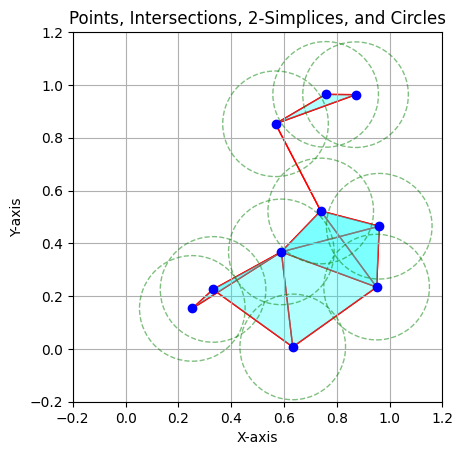

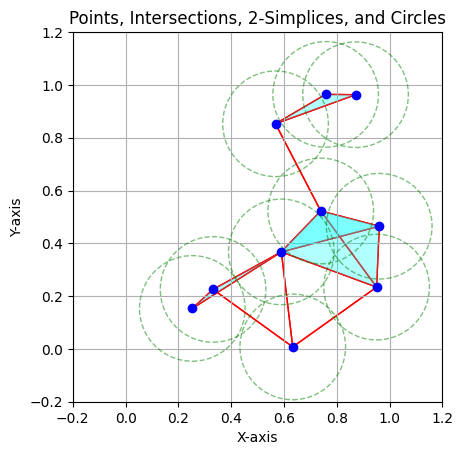

In [88]:
epsilon = 0.2
zero_simplices = generate_new_points()
one_simplices = get_intersections(zero_simplices, epsilon)
two_simplices = get_common_intersections(one_simplices)
cech_two_simplices = test_cech(zero_simplices, two_simplices, epsilon)

plot_points_and_lines_with_simplices(zero_simplices, one_simplices, two_simplices, epsilon, draw_circles=True)
plot_points_and_lines_with_simplices(zero_simplices, one_simplices, cech_two_simplices, epsilon, draw_circles=True)

In [9]:
def visualize_points(x, y):
    plt.scatter(x, y)
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.show()

## Vietoris-Rips 